# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

**Notes regarding this problem**

**Various funtion useful**

std deviation = df.std(), if we give it a arguement axis=1 it perform along the row instead of column     
Number of samples generated by the normal distribution generator df.shape[1], df.shape = rows,column    
length of dataframe basically gives us the column len(df)    
df.sem(axis=1) calulated the standard error ( sigma/sqrt(n))for each sample along the rows (axis=1)   
#print(df.std(axis=1)/np.sqrt(df.shape[1]), "  ", df.sem(axis=1), "  ", len(df), "  ",  df.shape[1])
df.describe() descibe all about the dataframe

std deviation = sigma , number of sample generated =n, std_error = standard error is sigma/sqrt(n)
**Breakdown of the problem
1. Need to calculate mean for each sample generated df.mean(axis=1) along row 
2. Need to have error. basically standard error is sigma/sqrt(n)  (can laso sem function)
3. Here we need to calucate the 95% confidence interval for the mean which is calucated using c* std_err; c is the critical or z value for 95% it is 1.96 see notes for more details. 
4. for this we need to plot a bar chart arguement (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html): 
    length of df i.e. df.index, value we want to plot here mean, yerr= err to ploted (margin of error yerr for each of     the rows in the data frame) , width of the bar = 0.8,  ticks_label =ticks label to be printed on x-axis 
    
 for putting asymetric erro   
 error bar values w/ different -/+ errors that also vary with the x-position  
 lower_error = 0.4 * error  
 upper_error = error  
 asymmetric_error = [lower_error, upper_error]  
 yerr = asymmetric_error
 
 
5.Take a horizonatl line and then generate the colours of each bar in a bar chart based on certain conditions with respect to the mean/confidence interval
 
 
 
 
 
 
 **Things to keep in mind**
 The sigma provided is the normal distribution function is the population sigma.  
 According to the central limit theorem the sampling sigma also known as standard error is population sigma/sqrt(number of samples). The sampling mean is approximately the same as the population mean.
Conf Int = the sampling mean +- margin of error
where the margin of error is the Z value for 95% multiplied by the standard error
Z can be calculated using qnorm or using a table, for a normal distribution its around 1.9602

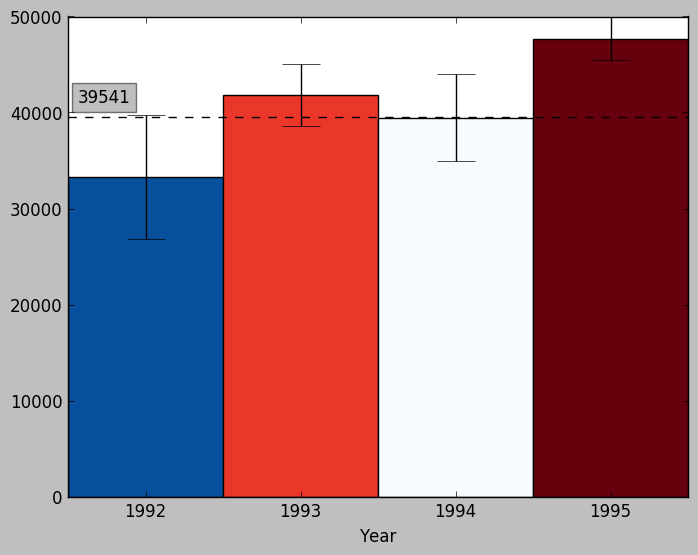

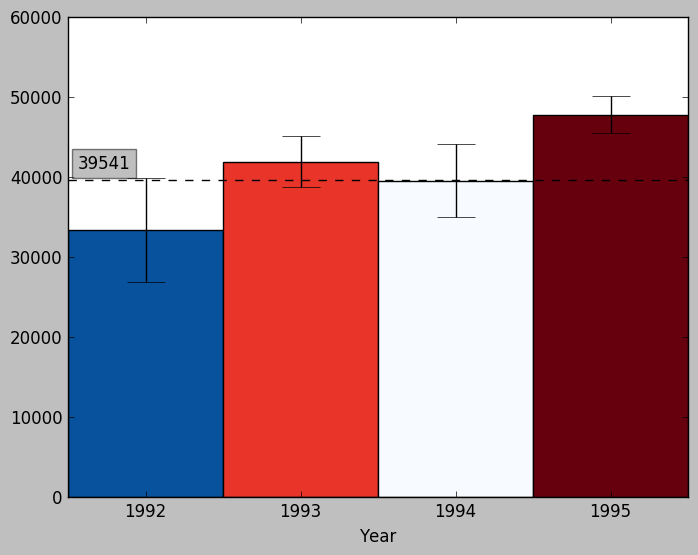

In [26]:
#Harder option: 
#Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of 
#data covered (e.g.)
#A gradient ranging from dark blue for the distribution being certainly below this y-axis
#to white if the value is certainly contained, 
#to dark red if the value is certainly not contained as the distribution is above the axis).
# Use the following data for this assignment:
#%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from matplotlib import cm

import pandas as pd
import numpy as np


np.random.seed(12345)
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html
#dataframe
df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                    np.random.normal(43000,100000,3650), 
                    np.random.normal(43500,140000,3650), 
                    np.random.normal(48000,70000,3650)], 
                    index=[1992,1993,1994,1995])




def plotter(df,threshold):
    value= threshold
#mean and err based on 95% coinfidence level along the row(axis= 1)
    df['Mean'] = df.mean(axis=1)
    df['err'] = 1.96*(df.sem(axis=1))
# diff between mean and the value of interest and point it to nearest hundred
    nearest= 100
    df['diff1'] = nearest*((value-df['Mean'])//nearest)
# Calucaltion of shade basically alpha value by interpolating the range in 0.5 to 1 so that color of bars can 
#be connected to amount of data
    df['sign'] = abs(df['diff1'])/df['diff1']
    old_range = abs(df['diff1']).min(axis=0), abs(df['diff1']).max(axis=0)
    new_range = [0.5,1.]
    df['shade'] = df['sign']*np.interp(abs(df['diff1']),old_range,new_range)


#creating colormaps for blue and red 
    blues = cm.Blues
    reds  = cm.Reds

#applying condition based upon the value of interest and mean and obtain color
    colour = ["white"  if(abs(value - (df.loc[i,'Mean']))<1.0) 
              else blues(abs(df.loc[i,'shade'])) if (value > df.loc[i,'Mean']) 
              else reds(abs(df.loc[i,'shade']))  for i in df.index]
    


#visulization
    
    plt.figure()
    plt.bar(df.index,df['Mean'] , yerr = df['err'], width = 1,tick_label=df.index,
            align='center',color =colour,edgecolor='black', capsize=14)

    plt.axhline(y=value, color='black', ls= '--' )
    text(df.index[0]-0.1, value+1500,"%d" %value,  bbox=dict(facecolor='grey', alpha=0.5) ,horizontalalignment='right')
    plt.xlabel("Year")
    
    cmap = cm.get_cmap('RdBu')
    #plt.colorbar();  # show color scale

    plt.savefig('Assignment_3.pdf')
    
    return plt 

plotter(df,39541).show()

<IPython.core.display.Javascript object>


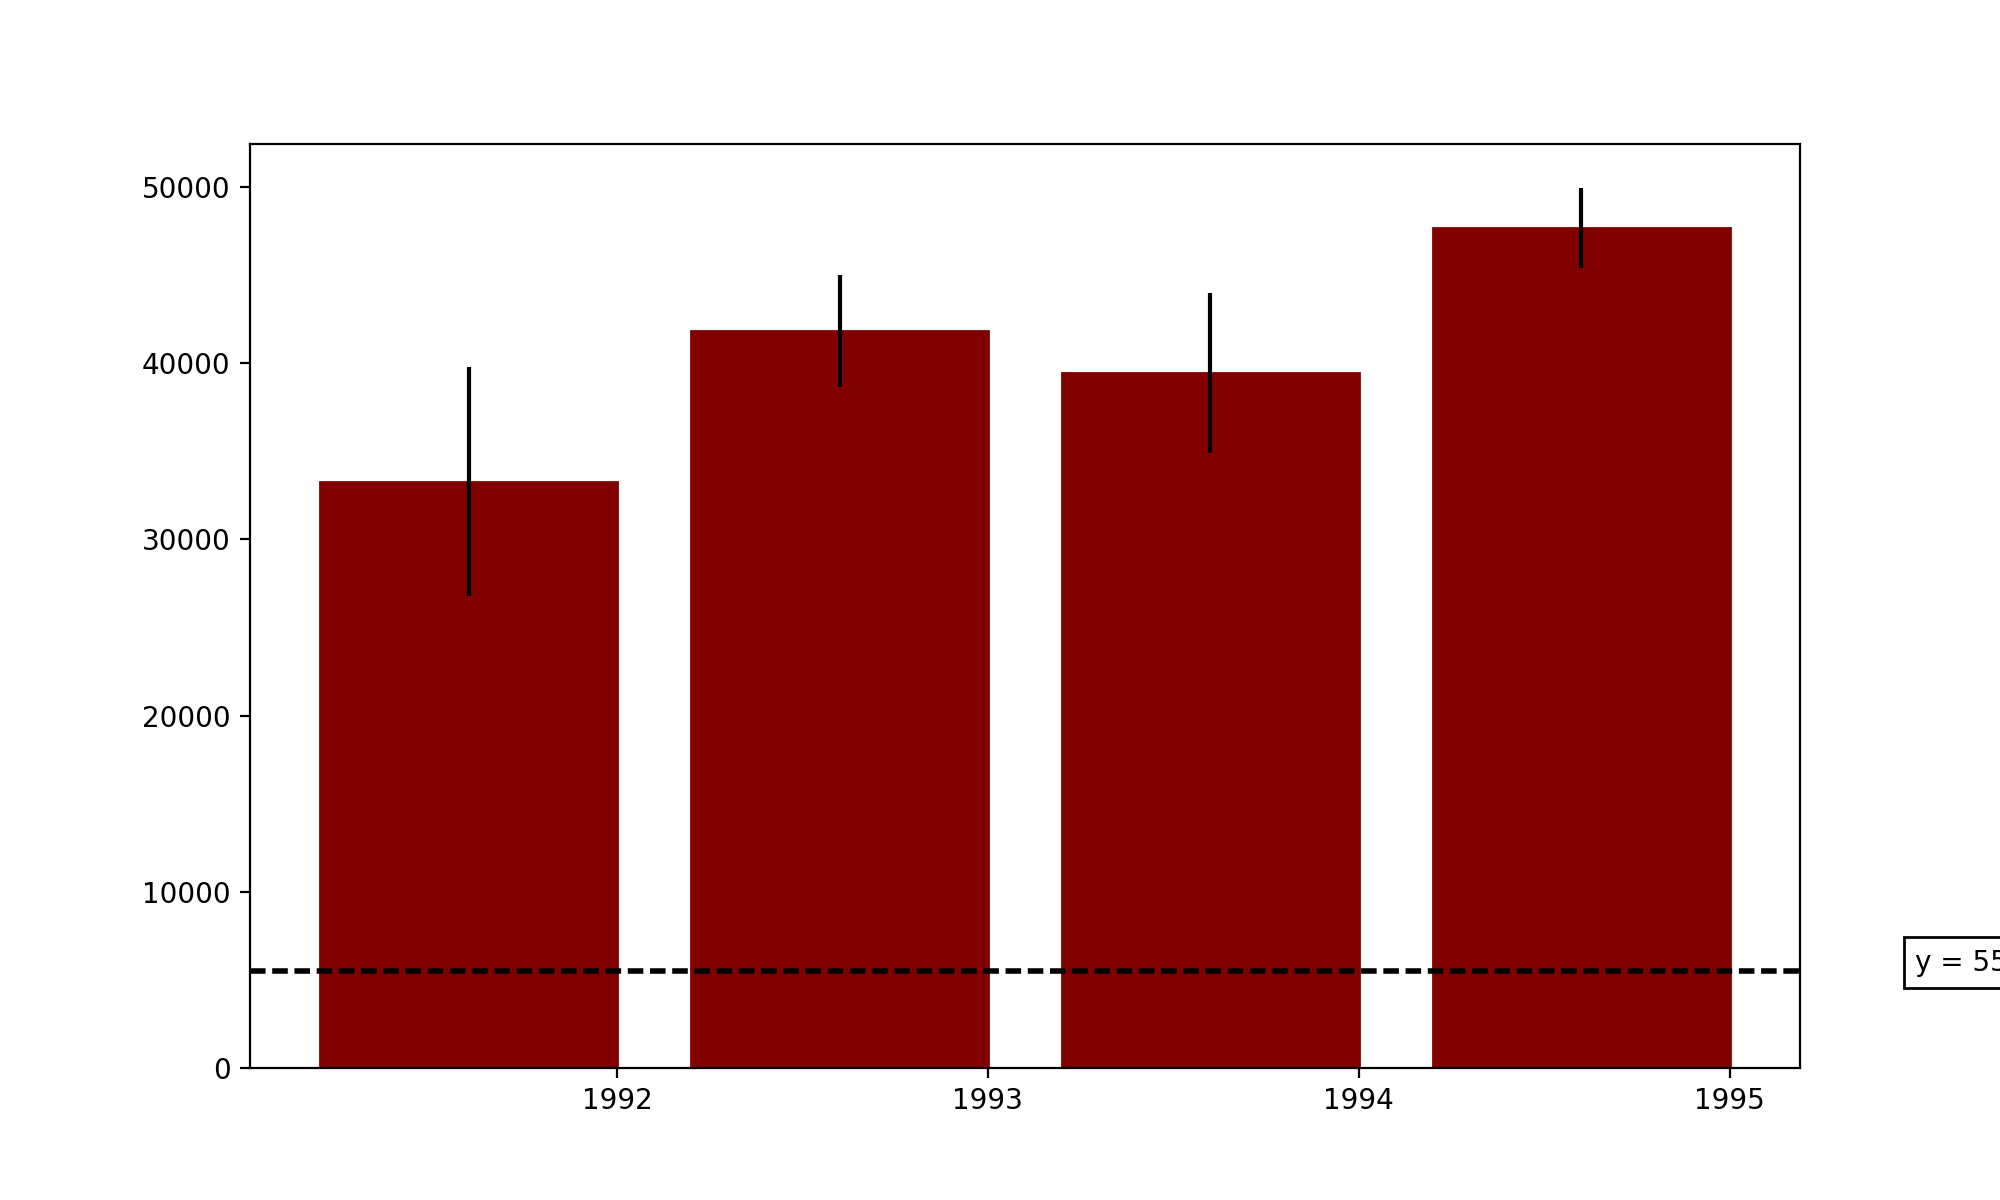

In [12]:
# Import useful libraries 
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
%matplotlib notebook

# Compute mean of each sample
df_mean = df.mean(axis=1) 

# Compute standard deviation of the mean (standard error)
df_std = df.std(axis=1)/np.sqrt(df.shape[1])

# Initialize a value for the horizontal axis
y = 37000

# Creating colors for each column sample
norm = Normalize(vmin=-1.96, vmax=1.96)
cmap = get_cmap('seismic')
df_colors = pd.DataFrame([])
df_colors['intensity'] = norm((df_mean-y)/df_std)
df_colors['color'] = [cmap(x) for x in df_colors['intensity']]

# Plot figure
plt.figure(figsize=(10,6))
bar_plot = plt.bar(df.index, df_mean, yerr=df_std*1.96, color=df_colors['color']);
hoz_line = plt.axhline(y=y, color='k', linewidth=2, linestyle='--');
y_text = plt.text(1995.9, y, 'y = %d' %y, bbox=dict(fc='white',ec='k'));

# Add xticks
plt.xticks(df.index+0.4, ('1992', '1993', '1994', '1995'));
def onclick(event):
    for i in range(4):
        shade = cmap(norm((df_mean.values[i]-event.ydata)/df_std.values[i]))
        print(i)
        bar_plot[i].set_color(shade) 
        hoz_line.set_ydata(event.ydata)
        y_text.set_text('y = %d' %event.ydata);
        y_text.set_position((1995.9, event.ydata));
    
plt.gcf().canvas.mpl_connect('button_release_event', onclick);
#onclick(37717)



,height,origin,weight
0,0.118167,UK,0.006686
1,0.832543,Germany,0.596560
2,0.892169,China,0.630907
3,0.472702,Chile,0.929213
4,0.141173,Brazil,0.685255
5,0.209438,Canada,0.901280
6,0.344105,Mexico,0.117756
7,0.112016,India,0.051739
8,0.607918,Iraq,0.339193
9,0.814818,USA,0.386694
